In [268]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import numpy as np
import cv2
import os
import glob
%matplotlib inline

output_dir="output_images/camera_cal/"

### Checking out the camera calibration images and ploting them out.

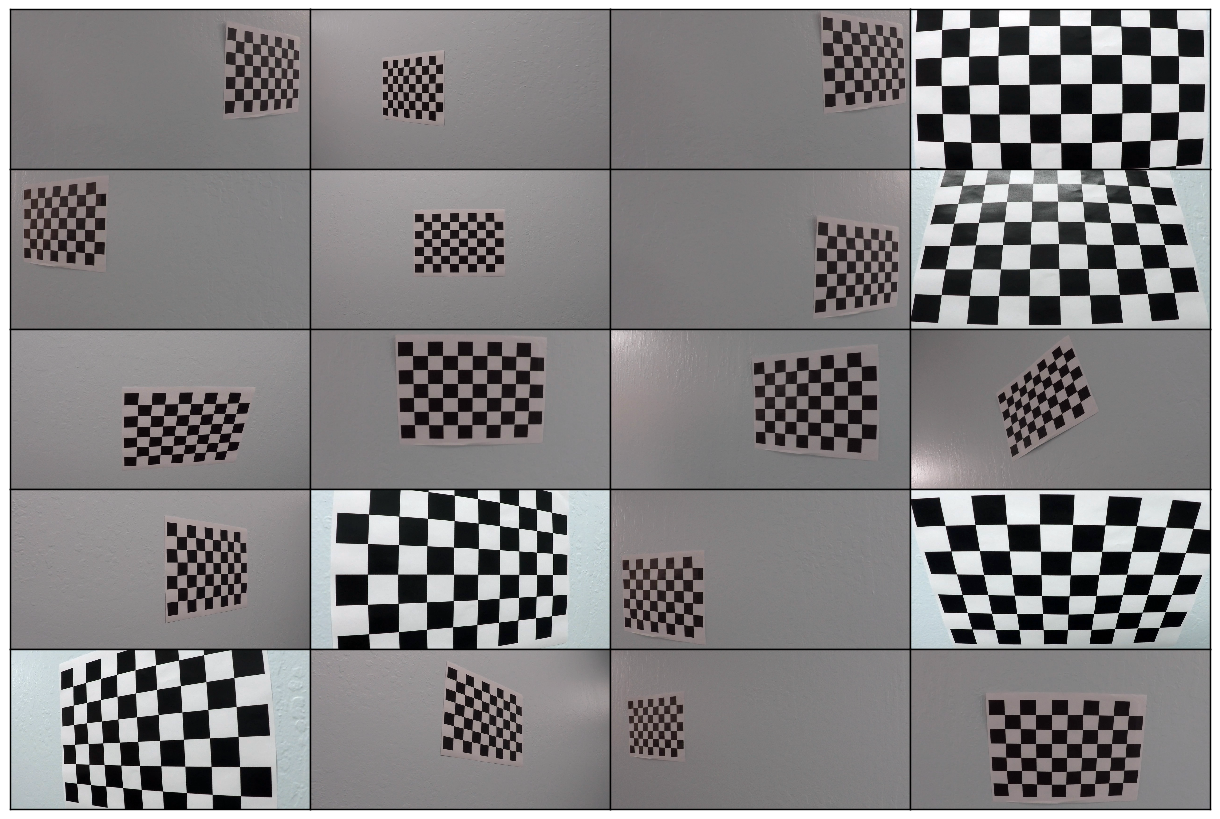

In [250]:
cal_images = glob.glob("./camera_cal/calibration*.jpg")

gs = gridspec.GridSpec(5, 4, top=2., bottom=0., right=2., left=0., hspace=0.,
        wspace=0.)

for g,i in enumerate(gs):
    ax = plt.subplot(i)
    ax.imshow(cv2.imread(images[g]))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('auto')
    

### Let's perform camera calibration and plot a sample of before, and after undistort.

In [251]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

for image in cal_images:
    #img = cv2.imread(image)
    print(str(image[13:]))
    img = cv2.imread(image)
    img_size = (img.shape[1], img.shape[0])
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    if ret == True:
    # Draw and display the corners
        objpoints.append(objp)
        imgpoints.append(corners)
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints,img_size,None,None)
        dst = cv2.undistort(img, mtx, dist, None, mtx)
        #saving results in a output_images directory
        cv2.imwrite("{0}/{1}".format(output_dir,str(image[13:])), dst)

calibration14.jpg
calibration7.jpg
calibration16.jpg
calibration1.jpg
calibration19.jpg
calibration6.jpg
calibration15.jpg
calibration3.jpg
calibration10.jpg
calibration18.jpg
calibration12.jpg
calibration13.jpg
calibration8.jpg
calibration5.jpg
calibration20.jpg
calibration2.jpg
calibration4.jpg
calibration9.jpg
calibration11.jpg
calibration17.jpg


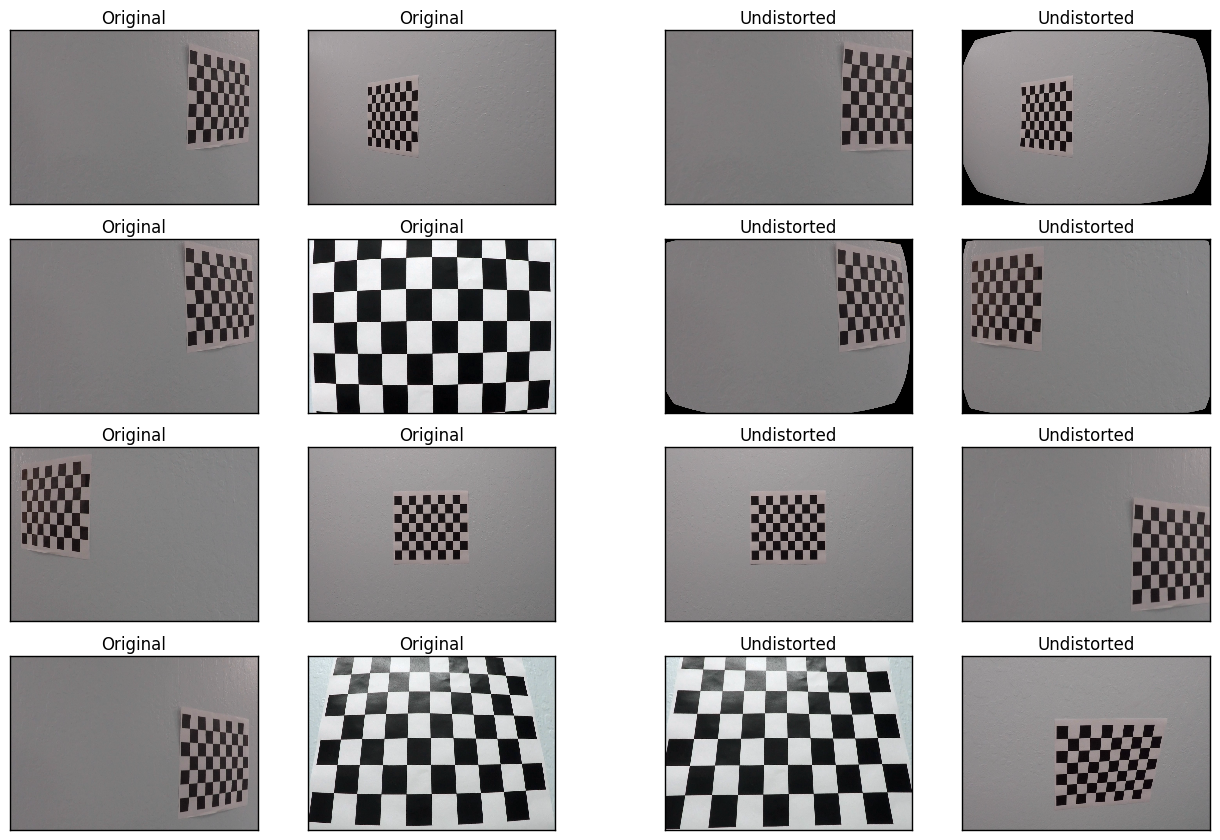

In [4]:
undistort = glob.glob("./output_images/camera_cal/calibration*.jpg")
gs0 = gridspec.GridSpec(1, 2, top=2., bottom=0., right=2., left=0., hspace=0.,wspace=0.2)
gs00 = gridspec.GridSpecFromSubplotSpec(4, 2, subplot_spec=gs0[0])
gs01 = gridspec.GridSpecFromSubplotSpec(4, 2, subplot_spec=gs0[1])

for idx,i in enumerate(gs00):
    ax = plt.subplot(i)
    ax.imshow(cv2.imread(images[idx]))
    ax.set_title('Original')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('auto')
    
for idx,i in enumerate(gs01):
    
    ax1 = plt.subplot(i)
    ax1.imshow(cv2.imread(undistort[idx]))
    ax1.set_title('Undistorted')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_aspect('auto')
plt.savefig("output_images/undistorted_calibration.jpg", format="jpg" ,bbox_inches="tight")

### We can see that not all images are processed since the nuber of corners are not the same on all images (9,6)

Since we calculated the object, and image points for camera calibration, we can use simple functions with our test images.

In [179]:
def undistort_images(img, obj_points, img_points):
    #Image size without the channel depth
    img_size = (img.shape[1], img.shape[0])
    #Camera calibration with object points and image points
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, img_size, None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)  
    return dst

def threshholds(image):
    #image = cv2.imread('output_images/test_images/test5.jpg')

    hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h= hls[:,:,0]
    l= hls[:,:,1]
    s= hls[:,:,2]
    sobelx = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=1)
    #sobely = cv2.Sobel(s, cv2.CV_64F, 1, 0, ksize=-3)
    #abs_sobelx = np.absolute(sobelx)
    #scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    sch_x = cv2.convertScaleAbs(sobelx)
    #sch_y = cv2.convertScaleAbs(sobely)
    #thresh_min = 20
    #thresh_max = 100

    #sxbinary = np.zeros_like(sch_x)
    #sxbinary[(sch_x >= thresh_min) & (sch_x <= thresh_max)] = 1
    #plt.imshow(sxbinary, cmap='gray')
    (T, treshG) = cv2.threshold(sch_x, 20, 300, cv2.THRESH_BINARY)
    (T, treshS) = cv2.threshold(s, 170, 300, cv2.THRESH_BINARY)
    gradient = cv2.subtract(treshG, treshS)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 8))
    closed = cv2.morphologyEx(treshG, cv2.MORPH_CLOSE, kernel)
    #eq = cv2.equalizeHist(gray)
    #blured = cv2.GaussianBlur(eq, (9,9), 0)
    #plt.imshow(cv2.cvtColor(closed, cv2.COLOR_GRAY2RGB))
    threshCombined = cv2.bitwise_or(treshG, treshS)
    return threshCombined


In [6]:
test_images = glob.glob("./test_images/*.jpg")
for image in test_images:
    print(str(image[14:]))
    img = cv2.imread(image)
    dst = undistort_images(img, objpoints, imgpoints)
    cv2.imwrite("output_images/test_images/{0}".format(str(image[13:])), dst)

test1.jpg
test5.jpg
test2.jpg
test4.jpg
straight_lines2.jpg
test6.jpg
straight_lines1.jpg
test3.jpg


### Let's see how our test images look before and after the undistortion.

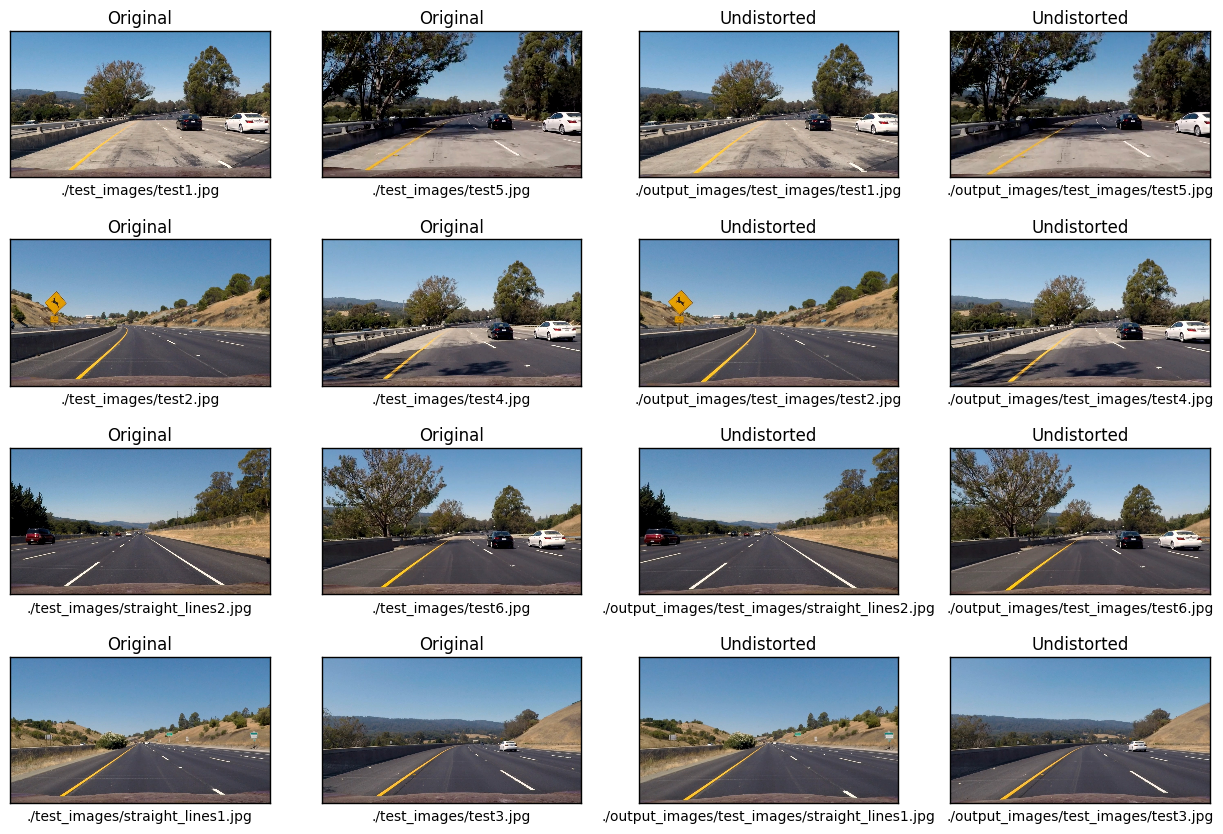

In [7]:
test_undistort = glob.glob("./output_images/test_images/*.jpg")
gs1 = gridspec.GridSpec(1, 2, top=2., bottom=0., right=2., left=0., hspace=0.,wspace=0.1)
gs10 = gridspec.GridSpecFromSubplotSpec(4, 2, subplot_spec=gs1[0])
gs11 = gridspec.GridSpecFromSubplotSpec(4, 2, subplot_spec=gs1[1])

for idx,i in enumerate(gs10):
    ax = plt.subplot(i)
    imgs = cv2.imread(test_images[idx])
    ax.imshow(cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB))
    ax.set_title('Original')
    ax.set_xlabel(str(test_images[idx]))
    ax.set_xticks([])
    ax.set_yticks([])
    #ax.set_aspect('auto')
    
for idx,i in enumerate(gs11):
    ax1 = plt.subplot(i)
    imgs = cv2.imread(test_undistort[idx])
    ax1.imshow(cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB))
    ax1.set_title('Undistorted')
    ax1.set_xlabel(str(test_undistort[idx]))
    ax1.set_xticks([])
    ax1.set_yticks([])
    #ax1.set_aspect('auto')
plt.savefig("output_images/undistorted_test.jpg", format="jpg" ,bbox_inches="tight")

We can see that the objects on the test pictures change their locations when undistorted.

### Then we apply sobel and thresholding on our images to find the lanes:

In [8]:
output_images = glob.glob("./output_images/test_images/*.jpg")
for image in output_images:
    print(str(image[28:]))
    img = cv2.imread(image)
    thr = threshholds(img)
    cv2.imwrite("output_images/thresholds/{0}".format(str(image[28:])), thr)

test1.jpg
test5.jpg
test2.jpg
test4.jpg
straight_lines2.jpg
test6.jpg
straight_lines1.jpg
test3.jpg


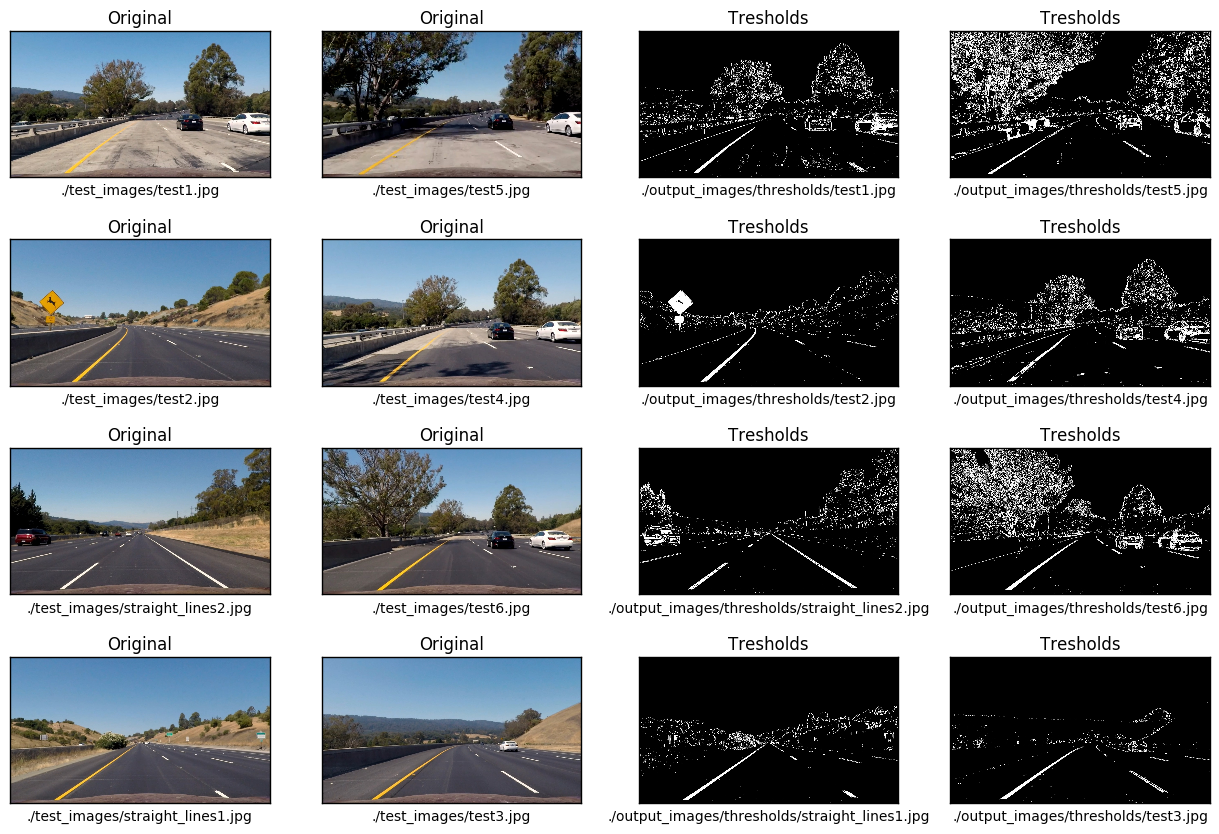

In [10]:
test_undistort = glob.glob("./output_images/test_images/*.jpg")
threshhold_images = glob.glob("./output_images/thresholds/*.jpg")
gs2 = gridspec.GridSpec(1, 2, top=2., bottom=0., right=2., left=0., hspace=0.,wspace=0.1)
gs20 = gridspec.GridSpecFromSubplotSpec(4, 2, subplot_spec=gs2[0])
gs21 = gridspec.GridSpecFromSubplotSpec(4, 2, subplot_spec=gs2[1])

for idx,i in enumerate(gs20):
    ax = plt.subplot(i)
    imgs = cv2.imread(test_undistort[idx])
    ax.imshow(cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB))
    ax.set_title('Original')
    ax.set_xlabel(str(test_images[idx]))
    ax.set_xticks([])
    ax.set_yticks([])
    #ax.set_aspect('auto')
    
for idx,i in enumerate(gs21):
    ax1 = plt.subplot(i)
    imgs = cv2.imread(threshhold_images[idx])
    ax1.imshow(cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB))
    ax1.set_title('Tresholds')
    ax1.set_xlabel(str(threshhold_images[idx]))
    ax1.set_xticks([])
    ax1.set_yticks([])
    #ax1.set_aspect('auto')
plt.savefig("output_images/threshold_test.jpg", format="jpg" ,bbox_inches="tight")

### After applying the threshold on our test images we use the perspective transform and warp them

In [274]:
def perspective_transform(img):

    xoffset = 50 # offset for dst points
    yoffset = 0
    img_size = (img.shape[1], img.shape[0]) 
    src = np.float32([(200, 700),(600, 450), (700,450),(1080, 700)])
    dst=np.float32([[350, 700], [350, 0],[950, 0],[950, 700]]) 
    # Given src and dst points, calculate transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    # Warp the image 
    warped = cv2.warpPerspective(img, M, img_size)

    # Return the resulting image and matrix
    return warped, M, Minv



In [362]:
def region_of_interest(img):
      
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    vertices = np.array([[(200,700),(200,0),(1200,0),(1200, 700)]],dtype=np.int32)   
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

#vertices = np.array([[(200,ft.shape[0]),(600,450),(700,450),(ft.shape[1],ft.shape[0])]],dtype=np.int32)
#mask = region_of_interest(, vertices)
#plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

In [363]:
threshhold_images = glob.glob("./output_images/thresholds/*.jpg")
for image in threshhold_images:
    print(str(image[27:]))
    img = cv2.imread(image)
    warped, M, Minv = perspective_transform(img)
    mask = region_of_interest(warped)
    cv2.imwrite("output_images/perspective_transform/{0}".format(str(image[27:])), mask)

test1.jpg
test5.jpg
test2.jpg
test4.jpg
straight_lines2.jpg
test6.jpg
straight_lines1.jpg
test3.jpg


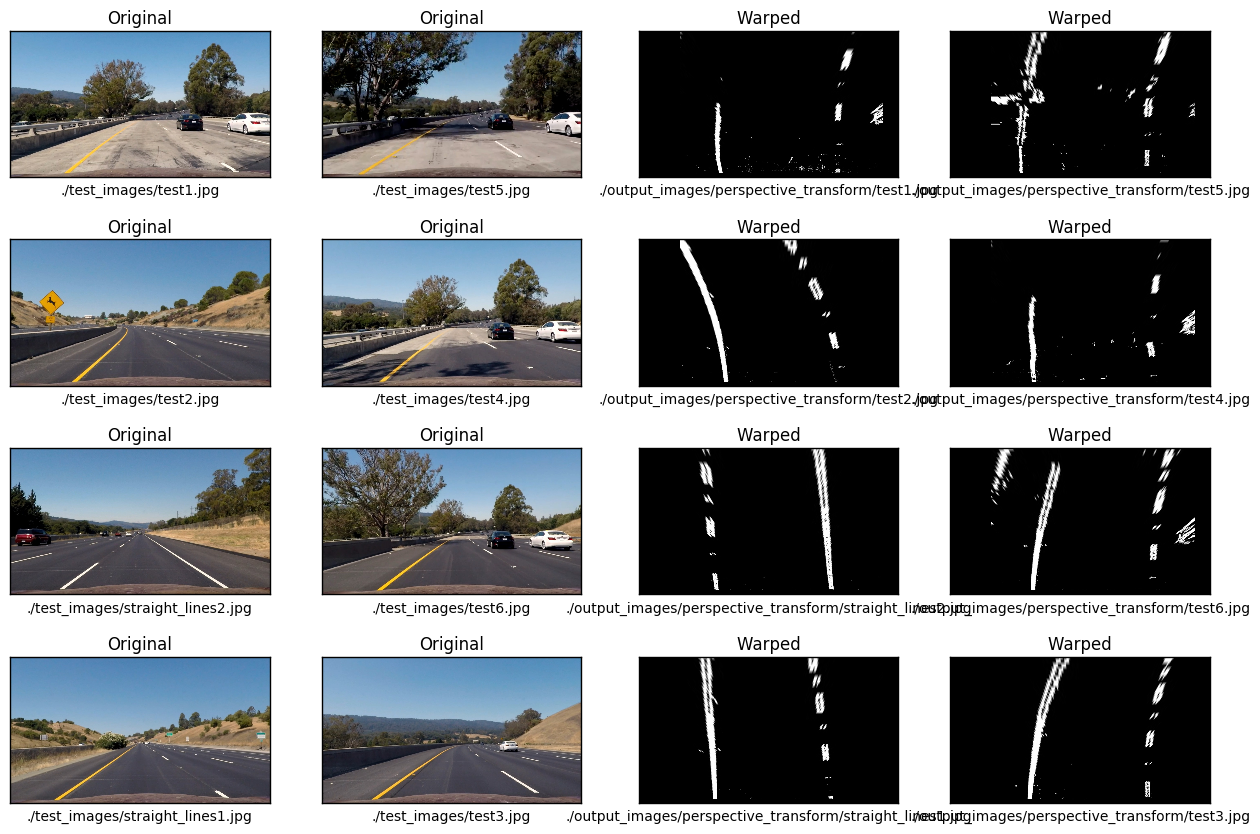

In [364]:
test_undistort = glob.glob("./output_images/test_images/*.jpg")
warped_images = glob.glob("./output_images/perspective_transform/*.jpg")
gs3 = gridspec.GridSpec(1, 2, top=2., bottom=0., right=2., left=0., hspace=0.,wspace=0.1)
gs30 = gridspec.GridSpecFromSubplotSpec(4, 2, subplot_spec=gs3[0])
gs31 = gridspec.GridSpecFromSubplotSpec(4, 2, subplot_spec=gs3[1])

for idx,i in enumerate(gs30):
    ax = plt.subplot(i)
    imgs = cv2.imread(test_undistort[idx])
    ax.imshow(cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB))
    ax.set_title('Original')
    ax.set_xlabel(str(test_images[idx]))
    ax.set_xticks([])
    ax.set_yticks([])
    #ax.set_aspect('auto')
    
for idx,i in enumerate(gs31):
    ax1 = plt.subplot(i)
    imgs = cv2.imread(warped_images[idx])
    ax1.imshow(cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB))
    ax1.set_title('Warped')
    ax1.set_xlabel(str(warped_images[idx]))
    ax1.set_xticks([])
    ax1.set_yticks([])
    #ax1.set_aspect('auto')
plt.savefig("output_images/warped_test.jpg", format="jpg" ,bbox_inches="tight")

In [212]:
#image = cv2.imread('output_images/test_images/test2.jpg')
#thresh = threshholds(image)
#warped, M, Minv = perspective_transform(thresh)
#plt.imshow(cv2.cvtColor(warped, cv2.COLOR_GRAY2RGB))

### Lets find the lanes and calculate the curvature and deviation from the center

building functions for finding lanes and curves

In [222]:
def find_lanes(warped):
    histogram = np.sum(warped[warped.shape[0]/2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((warped, warped, warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = warped.shape[0] - (window+1)*window_height
        win_y_high = warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
       
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    ploty = np.linspace(0, warped.shape[0]-1, warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    l, r, d = find_curves(leftx, lefty, rightx, righty, ploty, warped.shape)

    return left_fit, right_fit, ploty, left_fitx, right_fitx, l, r, d


def find_curves(leftx, lefty, rightx, righty, ploty, warped_size):
    y_eval = np.max(ploty)
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    #deviation

    left_side = left_fit_cr[0] * (warped_size[0] * ym_per_pix) ** 2 + left_fit_cr[1] * (warped_size[0] * ym_per_pix) + left_fit_cr[2]
    right_side = right_fit_cr[0] * (warped_size[0] * ym_per_pix) ** 2 + right_fit_cr[1] * (warped_size[0] * ym_per_pix) + right_fit_cr[2]
    center = (left_side + right_side) / 2.0
    
    deviation = (center - (warped_size[1] * xm_per_pix) / 2.0)
    #print(left_curverad, 'm', right_curverad, 'm')
    return left_curverad, right_curverad, deviation

#### Function that draws our final lane and information about curvature and deviation

In [372]:
def draw_lanes_on_image(binary_warped, undistorted_img, Minv, left_fitx, right_fitx, ploty, left_radius, right_radius, lane_deviation):
   
    # Create a blank image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    
    # Draw the lane
    cv2.fillPoly(color_warp, np.int_([pts]), (0, 255, 0))
    
    # Warp the blank back to original image 
    newwarp = cv2.warpPerspective(color_warp, Minv, (undistorted_img.shape[1], undistorted_img.shape[0])) 
    
    # Combine the result
    result = cv2.addWeighted(undistorted_img, 1, newwarp, 0.3, 0)
    
    curvature_text = "Curvature: Left = " + str(np.round(left_radius, 2)) + ", Right = " + str(np.round(right_radius, 2)) 
    font = cv2.FONT_HERSHEY_COMPLEX    
    cv2.putText(result, curvature_text, (350, 60), font, 1, (255,255,255), 2)
    deviation_text = "deviation from center = {:.2f} m".format(lane_deviation) 
    font = cv2.FONT_HERSHEY_COMPLEX    
    cv2.putText(result, deviation_text, (390, 90), font, 1, (255,255,255), 2)
        
    return result


#### And finally a function that makes our pipeline 

In [369]:
def pipeline(image):
    
    undistorted = undistort_images(image, objpoints, imgpoints)
    thresh = threshholds(undistorted)
    warped, M, Minv = perspective_transform(thresh)
    mask = region_of_interest(warped)
    left_fit, right_fit, ploty, left_fitx, right_fitx, l, r , d = find_lanes(mask)
    result = draw_lanes_on_image(warped, image, Minv, left_fitx, right_fitx, ploty, l, r, d)
    
    return result


In [373]:
images = glob.glob("./test_images/*.jpg")
for image in images:
    print(str(image[14:]))
    img = cv2.imread(image)
    result = pipeline(img)
    #plt.figure(figsize=(8,4))
    #plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    #plt.axis("off");
    cv2.imwrite("output_images/curves/{0}".format(str(image[14:])), result)

test1.jpg
test5.jpg
test2.jpg
test4.jpg
straight_lines2.jpg
test6.jpg
straight_lines1.jpg
test3.jpg


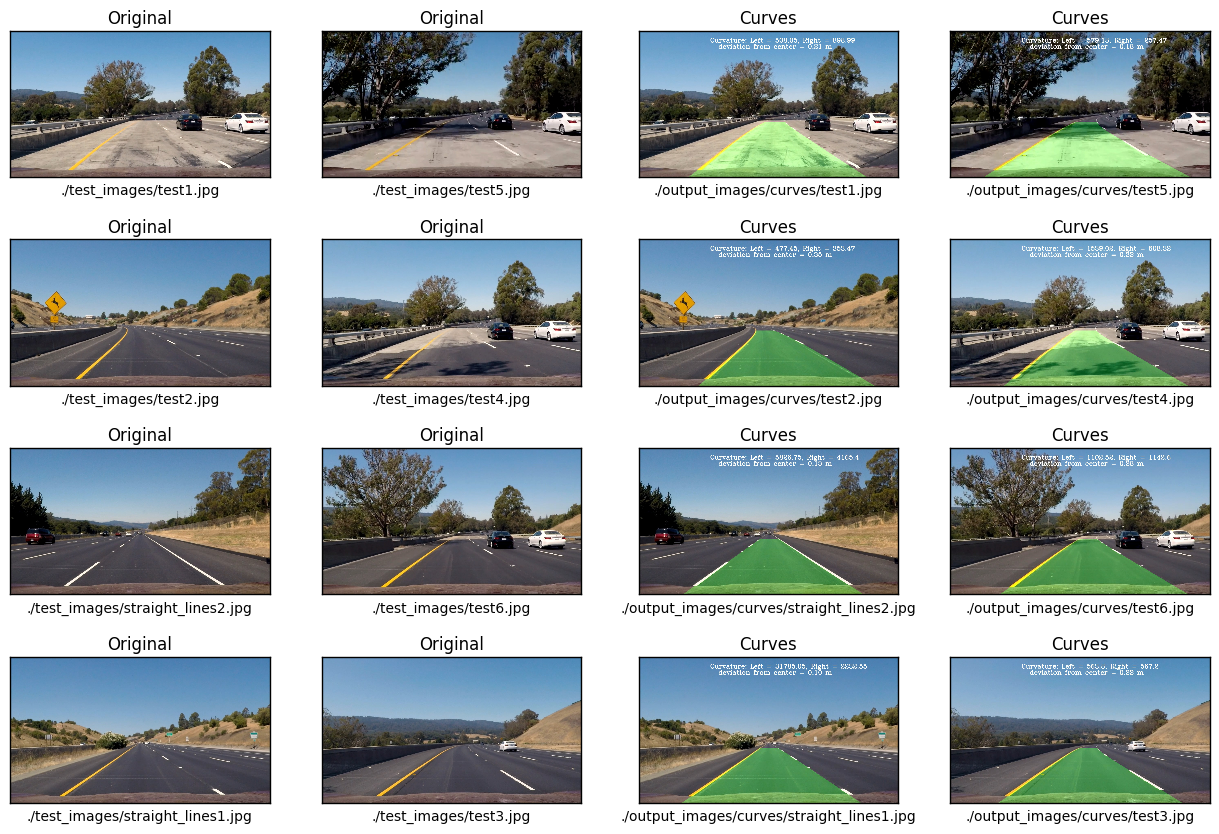

In [374]:
images = glob.glob("./test_images/*.jpg")
final_images = glob.glob("./output_images/curves/*.jpg")
gs4 = gridspec.GridSpec(1, 2, top=2., bottom=0., right=2., left=0., hspace=0.,wspace=0.1)
gs40 = gridspec.GridSpecFromSubplotSpec(4, 2, subplot_spec=gs4[0])
gs41 = gridspec.GridSpecFromSubplotSpec(4, 2, subplot_spec=gs4[1])

for idx,i in enumerate(gs40):
    ax = plt.subplot(i)
    imgs = cv2.imread(images[idx])
    ax.imshow(cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB))
    ax.set_title('Original')
    ax.set_xlabel(str(images[idx]))
    ax.set_xticks([])
    ax.set_yticks([])
    #ax.set_aspect('auto')
    
for idx,i in enumerate(gs31):
    ax1 = plt.subplot(i)
    imgs = cv2.imread(final_images[idx])
    ax1.imshow(cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB))
    ax1.set_title('Curves')
    ax1.set_xlabel(str(final_images[idx]))
    ax1.set_xticks([])
    ax1.set_yticks([])
    #ax1.set_aspect('auto')
plt.savefig("output_images/final_test.jpg", format="jpg" ,bbox_inches="tight")

### Test our pipeline on a video

In [375]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
video_output = "output_images/project_video_output.mp4"
clip1 = VideoFileClip("project_video.mp4")
clip1_output = clip1.fl_image(pipeline)
%time clip1_output.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video output_images/project_video_output.mp4
[MoviePy] Writing video output_images/project_video_output.mp4


100%|█████████▉| 1260/1261 [17:04<00:00,  1.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_images/project_video_output.mp4 

CPU times: user 18min 26s, sys: 2.32 s, total: 18min 28s
Wall time: 17min 6s


In [378]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_output))